<h1>Technical Test with Descartes Underwriting - Julien BOULAY<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Import-libraries-and-data" data-toc-modified-id="Import-libraries-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries and data</a></span><ul class="toc-item"><li><span><a href="#Train-data" data-toc-modified-id="Train-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train data</a></span></li><li><span><a href="#Test-data" data-toc-modified-id="Test-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Test data</a></span></li></ul></li><li><span><a href="#First-data-analysis" data-toc-modified-id="First-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First data analysis</a></span><ul class="toc-item"><li><span><a href="#Features-understanding" data-toc-modified-id="Features-understanding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Features understanding</a></span></li><li><span><a href="#Data-type-conversion" data-toc-modified-id="Data-type-conversion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data type conversion</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Exploration-of-binary-data" data-toc-modified-id="Exploration-of-binary-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploration of binary data</a></span></li><li><span><a href="#Exploration-of-non-binary-categorical-data" data-toc-modified-id="Exploration-of-non-binary-categorical-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploration of non binary categorical data</a></span></li><li><span><a href="#Exploration-of-continuous-data" data-toc-modified-id="Exploration-of-continuous-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exploration of continuous data</a></span></li></ul></li><li><span><a href="#Data-prepocessing" data-toc-modified-id="Data-prepocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data prepocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Handling-categorical-data" data-toc-modified-id="Handling-categorical-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Handling categorical data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Correlation analysis</a></span></li></ul></li><li><span><a href="#Prediction-task" data-toc-modified-id="Prediction-task-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prediction task</a></span><ul class="toc-item"><li><span><a href="#Choice-of-metrics" data-toc-modified-id="Choice-of-metrics-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Choice of metrics</a></span></li><li><span><a href="#Data-for-models" data-toc-modified-id="Data-for-models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data for models</a></span></li><li><span><a href="#First-model-:-Logistic-regression" data-toc-modified-id="First-model-:-Logistic-regression-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>First model : Logistic regression</a></span></li><li><span><a href="#Second-model-:-KNN" data-toc-modified-id="Second-model-:-KNN-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Second model : KNN</a></span></li><li><span><a href="#Third-model-:-Tree-based-model-(XGBoost)" data-toc-modified-id="Third-model-:-Tree-based-model-(XGBoost)-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Third model : Tree based model (XGBoost)</a></span></li></ul></li><li><span><a href="#Hyperparameter-tuning-and-export-results" data-toc-modified-id="Hyperparameter-tuning-and-export-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameter tuning and export results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Project description

The goal of this project is to determine whether a given client will have an accident or not. After a data exploration and processing phases, we will explore 3 machine learning models that we will evaluate with well-chosen metrics.

# Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
plt.style.use('seaborn')
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
df_train_auto = pd.read_csv('data/auto-insurance-fall-2017/train_auto.csv')
df_test_auto = pd.read_csv('data/auto-insurance-fall-2017/test_auto.csv')

## Train data

In [3]:
df_train_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
len(df_train_auto)

8161

**Checking missing values:**

In [5]:
df_train_auto.isna().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

## Test data

In [6]:
df_test_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [7]:
len(df_test_auto)

2141

In [8]:
df_test_auto.isna().sum()

INDEX             0
TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

**Remark:** We have, before cleaning, 8161 rows in the training data, 2141 rows in the test data, and 26 columns. It appears that there are 2 potential targets : TARGET_FLAG and TARGET_AMT. Here, we wil only focus on TARGET_FLAG.

**Remark:** In both datasets, we have missing values that we will handle in another section.

# First data analysis

## Features understanding

First, let's have a look at the different features since it will help us to better understand the problem.

In [9]:
df_train_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [10]:
df_train_auto.columns.tolist()

['INDEX',
 'TARGET_FLAG',
 'TARGET_AMT',
 'KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME',
 'PARENT1',
 'HOME_VAL',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'TRAVTIME',
 'CAR_USE',
 'BLUEBOOK',
 'TIF',
 'CAR_TYPE',
 'RED_CAR',
 'OLDCLAIM',
 'CLM_FREQ',
 'REVOKED',
 'MVR_PTS',
 'CAR_AGE',
 'URBANICITY']

- INDEX: redundant with the dataframe index (just a shift)
- TARGET_FLAG: our target
- TARGET_AMT: another possible target, seems to be the loss 
- KIDSDRIV
- AGE
- HOMEKIDS
- YOJ: ?
- INCOME
- PARENT1: is it a single parent ?
- HOME_VAL
- MSTATUS: marital status
- SEX
- EDUCATION
- JOB
- TRAVTIME
- CAR_USE
- BLUEBOOK: 'guidebook that compiles and quotes prices for new and used automobiles'
- TIF: ?
- CAR_TYPE
- RED_CAR: is the car red ?
- OLDCLAIM
- CLM_FREQ: claim frequency
- REVOKED: License revoked
- MVR_PTS: motor vehicle record points 
- CAR_AGE
- URBANICITY


In [11]:
df_train_auto['TARGET_AMT'][df_train_auto['TARGET_FLAG'] == 0].sum()

0.0

**About the target:** Since TARGET_AMT is null for TARGET_FLAG = 0, we conclude that the target TARGET_FLAG tells us if there will be a claim by the client. TARGET_AMT represents the amount of the claim.

## Data type conversion

**Find categorical / continuous features**:

In [12]:
df_train_auto.nunique()

INDEX          8161
TARGET_FLAG       2
TARGET_AMT     1949
KIDSDRIV          5
AGE              60
HOMEKIDS          6
YOJ              21
INCOME         6612
PARENT1           2
HOME_VAL       5106
MSTATUS           2
SEX               2
EDUCATION         5
JOB               8
TRAVTIME         97
CAR_USE           2
BLUEBOOK       2789
TIF              23
CAR_TYPE          6
RED_CAR           2
OLDCLAIM       2857
CLM_FREQ          6
REVOKED           2
MVR_PTS          13
CAR_AGE          30
URBANICITY        2
dtype: int64

It appears that we have a mix of categorical and continuous features. We can consider as categorical features features with less than 8 unique values. MVR_PTS can be considered as a categorical feature but we decide to keep it the way it is (ordinal variable let's say). 

Antoher thing we can notice is that among categorical features, we have both binary and non binary categorical features.

In [13]:
categorical_features = df_train_auto.nunique()[df_train_auto.nunique() <= 8].index.tolist()
continuous_features = df_train_auto.nunique()[df_train_auto.nunique() > 8].index.tolist()
continuous_features.remove('INDEX')
continuous_features.remove('TARGET_AMT')

binary_features =  df_train_auto.nunique()[df_train_auto.nunique() == 2].index.tolist()
non_binary_categorical_features = df_train_auto.nunique()[(df_train_auto.nunique() != 2) & (df_train_auto.nunique() <= 8)].index.tolist()

In [14]:
df_train_auto[categorical_features].head()

,TARGET_FLAG,KIDSDRIV,HOMEKIDS,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,CLM_FREQ,REVOKED,URBANICITY
0,0,0,0,No,z_No,M,PhD,Professional,Private,Minivan,yes,2,No,Highly Urban/ Urban
1,0,0,0,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,0,No,Highly Urban/ Urban
2,0,0,1,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,2,No,Highly Urban/ Urban
3,0,0,0,No,Yes,M,<High School,z_Blue Collar,Private,Minivan,yes,0,No,Highly Urban/ Urban
4,0,0,0,No,Yes,z_F,PhD,Doctor,Private,z_SUV,no,2,Yes,Highly Urban/ Urban


In [15]:
df_train_auto[continuous_features].head()

,AGE,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,MVR_PTS,CAR_AGE
0,60.0,11.0,"$67,349",$0,14,"$14,230",11,"$4,461",3,18.0
1,43.0,11.0,"$91,449","$257,252",22,"$14,940",1,$0,0,1.0
2,35.0,10.0,"$16,039","$124,191",5,"$4,010",4,"$38,690",3,10.0
3,51.0,14.0,NaN,"$306,251",32,"$15,440",7,$0,0,6.0
4,50.0,NaN,"$114,986","$243,925",36,"$18,000",1,"$19,217",3,17.0


In [16]:
df_train_auto[binary_features].head()

,TARGET_FLAG,PARENT1,MSTATUS,SEX,CAR_USE,RED_CAR,REVOKED,URBANICITY
0,0,No,z_No,M,Private,yes,No,Highly Urban/ Urban
1,0,No,z_No,M,Commercial,yes,No,Highly Urban/ Urban
2,0,No,Yes,z_F,Private,no,No,Highly Urban/ Urban
3,0,No,Yes,M,Private,yes,No,Highly Urban/ Urban
4,0,No,Yes,z_F,Private,no,Yes,Highly Urban/ Urban


In [17]:
df_train_auto[non_binary_categorical_features]

,KIDSDRIV,HOMEKIDS,EDUCATION,JOB,CAR_TYPE,CLM_FREQ
0,0,0,PhD,Professional,Minivan,2
1,0,0,z_High School,z_Blue Collar,Minivan,0
2,0,1,z_High School,Clerical,z_SUV,2
3,0,0,<High School,z_Blue Collar,Minivan,0
4,0,0,PhD,Doctor,z_SUV,2
...,...,...,...,...,...,...
8156,0,0,z_High School,z_Blue Collar,Panel Truck,0
8157,1,2,PhD,Manager,Minivan,0
8158,0,0,Masters,NaN,Panel Truck,0
8159,0,0,Bachelors,Home Maker,Minivan,0


**Change data type for continuous features**:

In [18]:
amount_features = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

In [19]:
df_train_auto[amount_features] = df_train_auto[amount_features].replace('[\$,]', '', regex=True).astype(float)
df_test_auto[amount_features] = df_test_auto[amount_features].replace('[\$,]', '', regex=True).astype(float)

# Data exploration

## Exploration of binary data

In [20]:
def plot_frequency_binary_features(df, binary_features):
    """Plot frequency of binary features in df"""
    for binary_feature in binary_features:
        sns.catplot(x=binary_feature, kind="count", data=df)
        plt.show()
    return


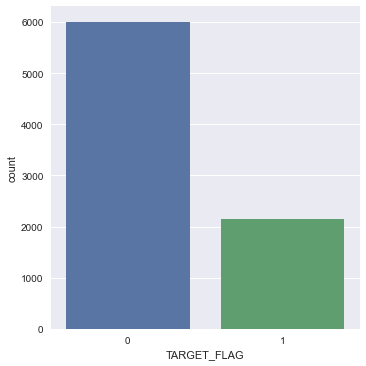

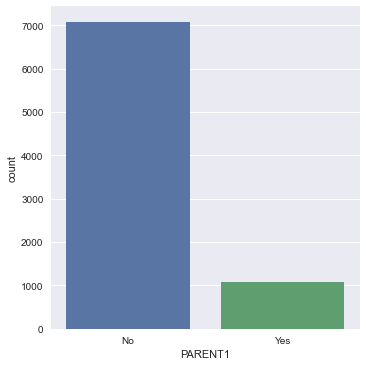

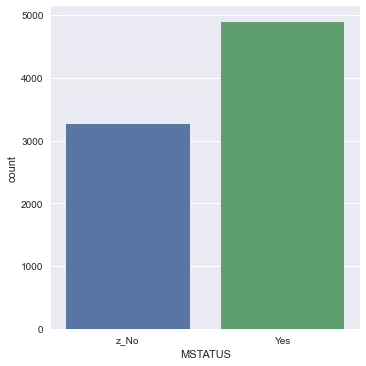

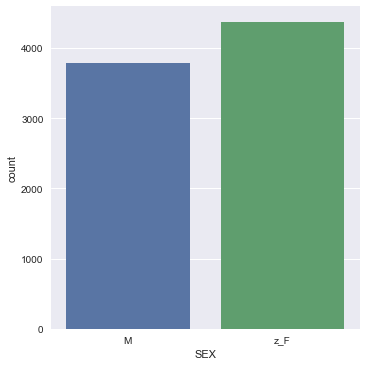

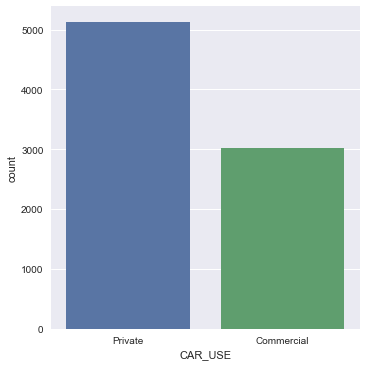

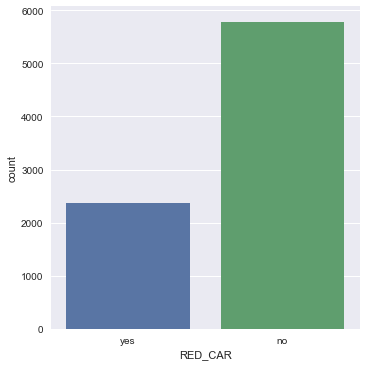

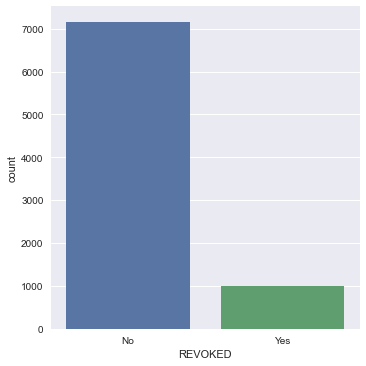

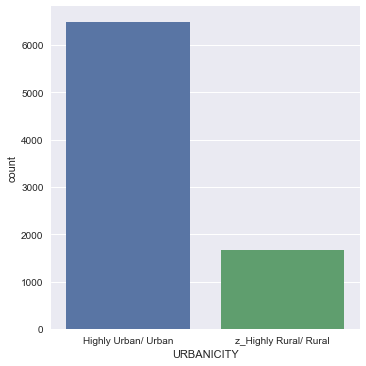

In [21]:
plot_frequency_binary_features(df_train_auto, binary_features)

**Conclusions** 

- TARGET_FLAG is an imbalanced target : there are 3 times more 0s than 1s. We will have to choose an appropriate metric to evaluate our model.
- PARENT1, RED_CAR, REVOKED, URBANICITY are imbalanced features.

## Exploration of non binary categorical data

In [22]:
def plot_frequency_non_binary_categorical_features(df, non_binary_categorical_features):
    """Plot frequency of non binary categorical features in df"""
    for non_binary_feature in non_binary_categorical_features:
        sns.catplot(x=non_binary_feature, kind="count", data=df)
        plt.show()
    return


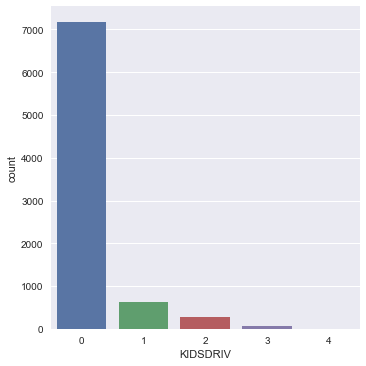

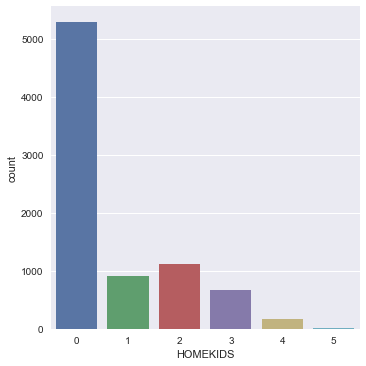

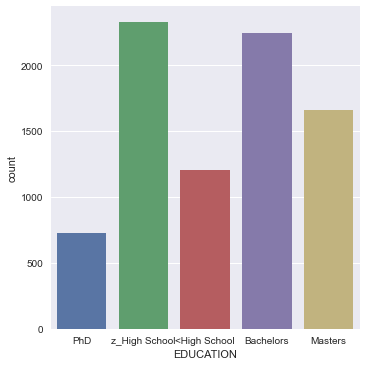

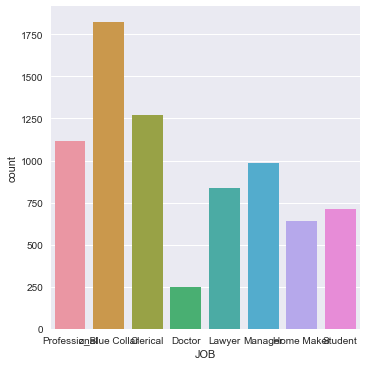

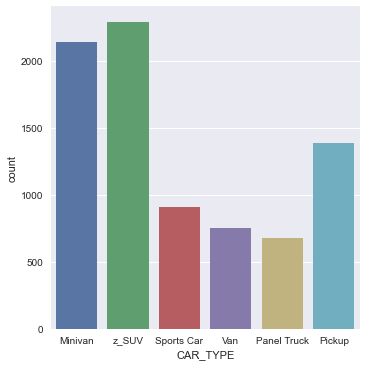

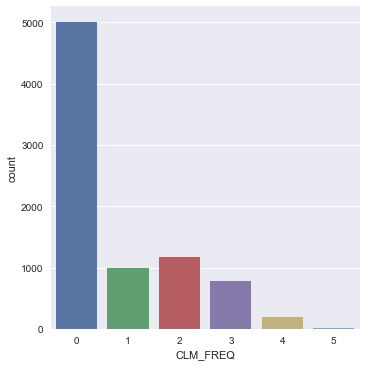

In [23]:
plot_frequency_non_binary_categorical_features(df_train_auto, non_binary_categorical_features)

**Conclusions**

- KIDSDRIV is highly imbalanced between 0 and > 0. Thus, we will binary encode this feature : 0 if 0 KIDSDRIV and 1 if at least 1 KIDSDRIV
- HOMEKIDS : same conclusion
- CLM_FREQ : we draw the same kind of conclusions 
- We keep other categorical features the way they are

## Exploration of continuous data

In [24]:
def plot_distribution_continuous_features(df, continuous_features):
    """Plot frequency of continuous features in df"""
    for continuous_feature in continuous_features:
        df[continuous_feature].hist(density = True)
        plt.title(f'{continuous_feature} distribution')
#         sns.catplot(x=continuous_feature, kind="count", data=df)
        plt.show()
    return


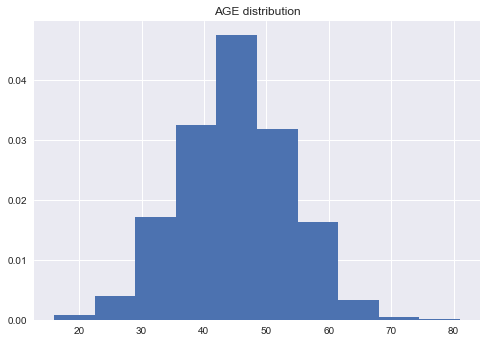

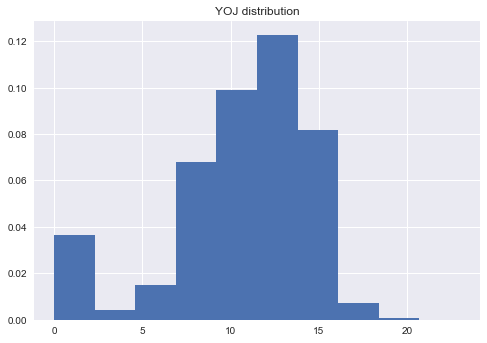

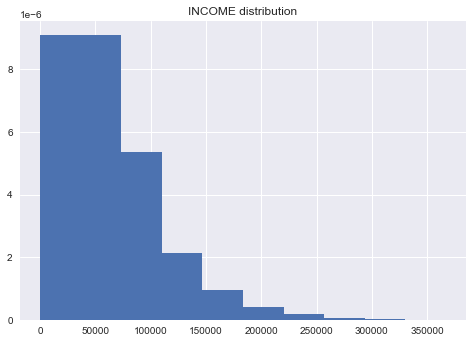

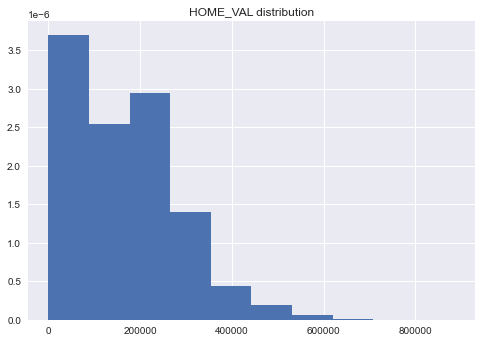

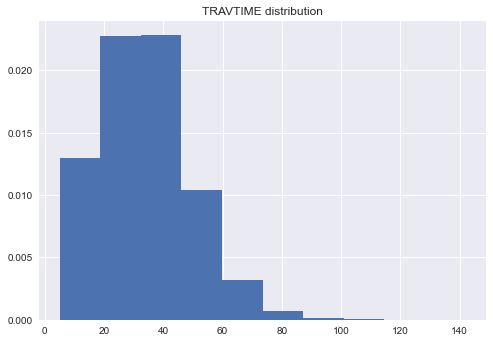

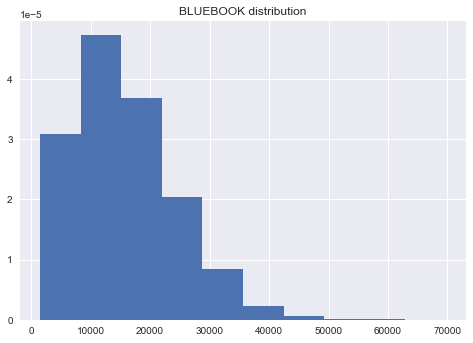

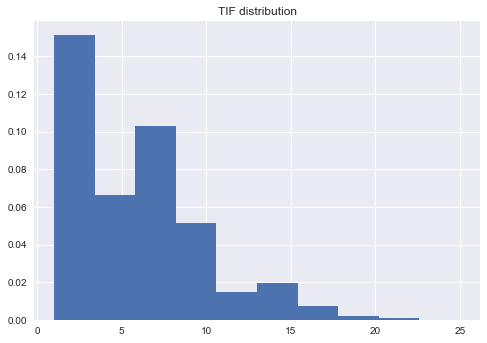

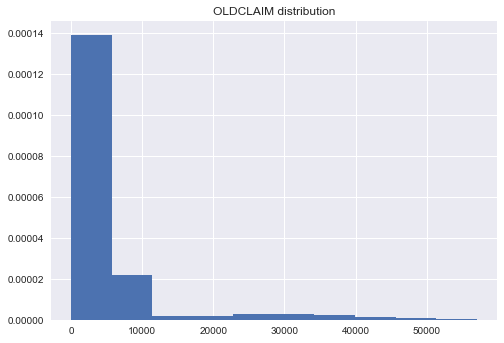

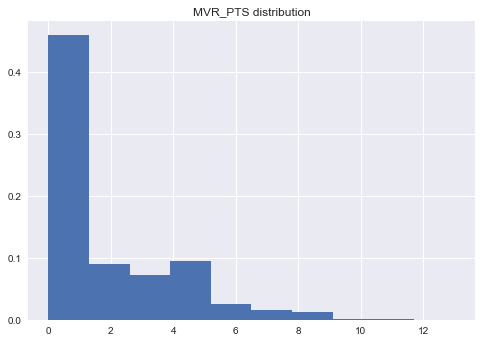

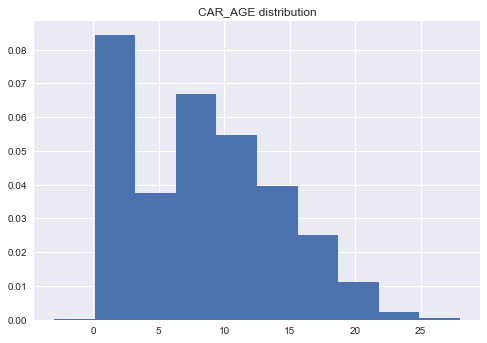

In [25]:
plot_distribution_continuous_features(df_train_auto, continuous_features)

**Conclusions**

- AGE appears to be normally distributed
- INCOME distribution : the majority of people in our training data earn less than 100,000 dollars
- HOME_VAL : we notice that there are a lot of people who don't own their homes
- TRAVTIME : the majority of people in our sample drive less than (40 min per day?) (40hours a year?)
- OLDCLAIM : the vast majority of the customers have not had an incident in the past

# Data prepocessing 

In [26]:
# Our final datasets
df_train = df_train_auto.drop(columns = ['INDEX', 'TARGET_AMT'])
df_test = df_test_auto.drop(columns = ['INDEX', 'TARGET_AMT'])

## Handling missing values

We can either : drop missing values or fill it using informations contained in the dataframe.

For continuous features, we decide to fill with median value (in order not to be influenced by outliers).

For categorical features, we can drop values, fill it with most frequent, predict the value using a ML model, treat it as another category ... We decide to treat it as another category since there are only missing values for JOB.

In [27]:
df_train[continuous_features] = df_train[continuous_features].fillna(df_train[continuous_features].median())
df_test[continuous_features] = df_test[continuous_features].fillna(df_test[continuous_features].median())

In [28]:
df_train['JOB'] = df_train['JOB'].fillna('Not_Given')
df_test['JOB'] = df_test['JOB'].fillna('Not_Given')

## Handling categorical data

**Convert binary features to 0/1**:

In [29]:
def convert_binary_col_to_0_1(df, binary_col, one_val):
    """Convert a two classes feature into a binary feature 0/1
    By definition, the value 1 corresponds to one_val"""
    return (df[binary_col] == one_val).apply(int)

In [30]:
#PARENT1
df_train['PARENT1'] = convert_binary_col_to_0_1(df_train, 'PARENT1','Yes')
df_test['PARENT1'] = convert_binary_col_to_0_1(df_test, 'PARENT1','Yes')

#MSTATUS
df_train['MSTATUS'] = convert_binary_col_to_0_1(df_train, 'MSTATUS','Yes')
df_test['MSTATUS'] = convert_binary_col_to_0_1(df_test, 'MSTATUS','Yes')

#SEX
df_train['SEX'] = convert_binary_col_to_0_1(df_train, 'SEX','z_F')
df_test['SEX'] = convert_binary_col_to_0_1(df_test, 'SEX','z_F')

#CAR_USE
df_train['CAR_USE'] = convert_binary_col_to_0_1(df_train, 'CAR_USE','Private')
df_test['CAR_USE'] = convert_binary_col_to_0_1(df_test, 'CAR_USE','Private')

#RED_CAR
df_train['RED_CAR'] = convert_binary_col_to_0_1(df_train, 'RED_CAR','yes')
df_test['RED_CAR'] = convert_binary_col_to_0_1(df_test, 'RED_CAR','yes')

#REVOKED
df_train['REVOKED'] = convert_binary_col_to_0_1(df_train, 'REVOKED','Yes')
df_test['REVOKED'] = convert_binary_col_to_0_1(df_test, 'REVOKED','Yes')

#URBANICITY
df_train['URBANICITY'] = convert_binary_col_to_0_1(df_train, 'URBANICITY','Highly Urban/ Urban')
df_test['URBANICITY'] = convert_binary_col_to_0_1(df_test, 'URBANICITY','Highly Urban/ Urban')

In [31]:
#Sanity check
df_train[binary_features].nunique()

TARGET_FLAG    2
PARENT1        2
MSTATUS        2
SEX            2
CAR_USE        2
RED_CAR        2
REVOKED        2
URBANICITY     2
dtype: int64

**Convert some non binary categorical features to categorical features (according to 4.2)**:

In [32]:
#Convention : 0 if 0, 1 if more than 0.

#KIDSDRIV
df_train['KIDSDRIV_bool'] = (df_train['KIDSDRIV'] > 0).astype(int)
df_test['KIDSDRIV_bool'] = (df_test['KIDSDRIV'] > 0).astype(int)

#HOMEKIDS
df_train['HOMEKIDS_bool'] = (df_train['HOMEKIDS'] > 0).astype(int)
df_test['HOMEKIDS_bool'] = (df_test['HOMEKIDS'] > 0).astype(int)

#CLM_FREQ
df_train['CLM_FREQ_bool'] = (df_train['CLM_FREQ'] > 0).astype(int)
df_test['CLM_FREQ_bool'] = (df_test['CLM_FREQ'] > 0).astype(int)

In [33]:
# Removing old columns 

df_train.drop(columns = ['KIDSDRIV', 'HOMEKIDS', 'CLM_FREQ'], inplace = True)
df_test.drop(columns = ['KIDSDRIV', 'HOMEKIDS', 'CLM_FREQ'], inplace = True)

**Other categorical data**

We now have to handle the following 3 variables :

- EDUCATION
- JOB
- CAR_TYPE

In [34]:
# Distinct categories for these variables
df_train[['EDUCATION', 'JOB', 'CAR_TYPE']].nunique()

EDUCATION    5
JOB          9
CAR_TYPE     6
dtype: int64

Here, it is difficult to say if the variables are ordinal (debate for education). We therefore propose to one hot encode them, the number of categories being "low". There exists other types of encoding, such as target encoding but there is a risk of target leakage when using it so we have to be careful. We also have the CatBoostEncoding, a kind of target encoder which deals with this issue of target leakage.

In [35]:
train_dummies = pd.get_dummies(df_train[['EDUCATION', 'JOB', 'CAR_TYPE']])
df_train = pd.concat([df_train, train_dummies], axis = 1).drop(columns = ['EDUCATION', 'JOB', 'CAR_TYPE'])

test_dummies = pd.get_dummies(df_test[['EDUCATION', 'JOB', 'CAR_TYPE']])
df_test = pd.concat([df_test, test_dummies], axis = 1).drop(columns = ['EDUCATION', 'JOB', 'CAR_TYPE'])

## Correlation analysis

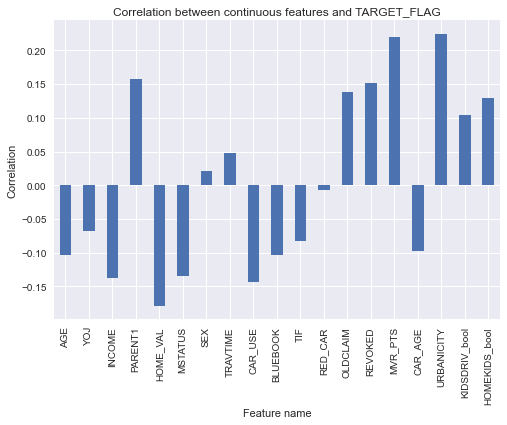

In [36]:
df_train[df_train.columns[:20]].drop(columns = ['TARGET_FLAG']).corrwith(df_train["TARGET_FLAG"]).plot(kind = 'bar')
plt.title('Correlation between continuous features and TARGET_FLAG')
plt.ylabel('Correlation')
plt.xlabel('Feature name')
plt.show()

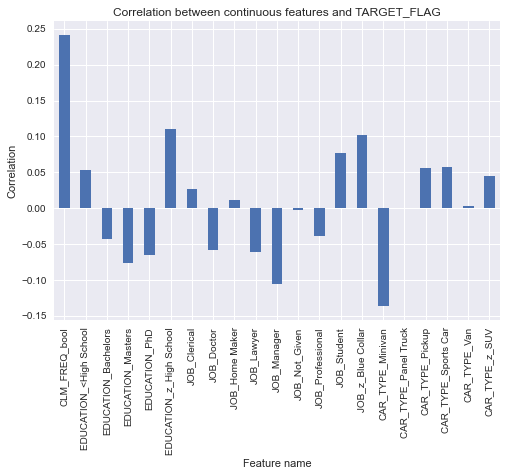

In [37]:
df_train[df_train.columns[20:]].corrwith(df_train["TARGET_FLAG"]).plot(kind = 'bar')
plt.title('Correlation between continuous features and TARGET_FLAG')
plt.ylabel('Correlation')
plt.xlabel('Feature name')
plt.show()

**Conclusions** 

SEX and RED_CAR have a low correlation with the target. Thus we decide to drop these column. It is important to have a reasonable number of features to keep the model simple and thus avoid overfitting. We notice that some features from the one hot encoding are also poorly correlated with the target. We propose to keep them for the moment.


Let's have a look at the correlation between the features : 

In [38]:
df_train.drop(columns = ['SEX','RED_CAR'], inplace = True)
df_test.drop(columns = ['SEX','RED_CAR'], inplace = True)

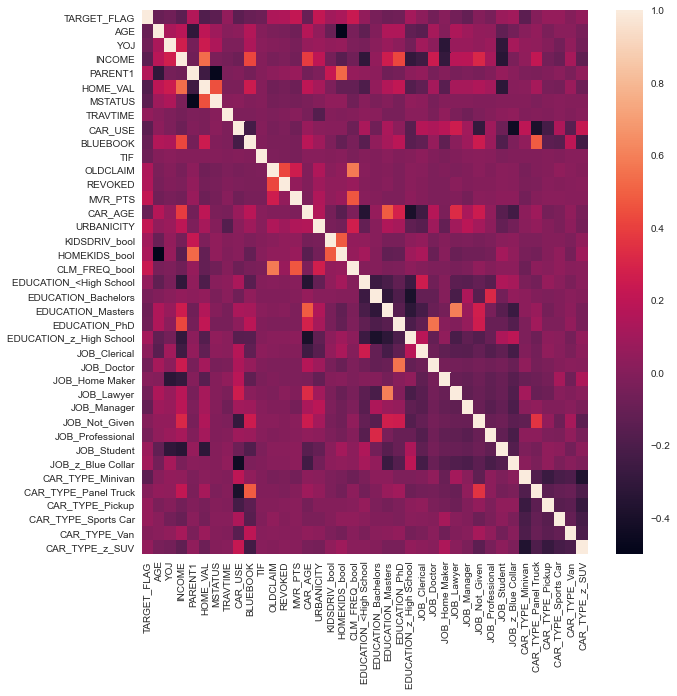

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr().round(2))
plt.show()

Such a matrix with so many features is always tricky to interpret. In machine learning, some models require that the input variables are independent (as for linear models), here it seems that some features are correlated but at first we propose not to do the sorting on this criterion. To improve the model it would be interesting to push this analysis to do feature selection.

# Prediction task

In [40]:
import warnings
warnings.filterwarnings('ignore')

## Choice of metrics

In [41]:
df_train['TARGET_FLAG'].value_counts() / df_train['TARGET_FLAG'].value_counts().sum()

0    0.736184
1    0.263816
Name: TARGET_FLAG, dtype: float64

We have a binary classification task with an imbalanced target (more 0s than 1s). Thus, our choice of metric will be important. Indeed, if we choose the accuracy (=correct predictions / total predictions), we are faced with the following problem: 
a naive model that predicts only 0s will have an accuracy of 73.6%.

In order to solve this issue we decide to use the F-Score :

**Metric** : F-measure because we have an imbalanced target.

- Precision = TruePositive / (TruePositive + FalsePositive) = "Positive predictive value"
- Recall = TruePositive / (TruePositive + FalseNegative) = "Sensitivity"
- F-Score = (2 * Precision * Recall) / (Precision + Recall)

**Another metric** : We prefer to have false positives than false negatives in the sense that we prefer to expect a loss that does not occur rather than the opposite. Thus, evaluating the number of false negatives is important in our case.

**Loss function** : Logloss 

## Data for models

We split our data into a train set and a test set. It's mandatory since we don't want to train our model on our evaluation set.

In [42]:
X = df_train.drop(columns = ['TARGET_FLAG'])
y = df_train['TARGET_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## First model : Logistic regression

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [43]:
from sklearn.linear_model import LogisticRegression

import random
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

**Evaluation**

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [44]:
y_pred_model_1 = clf.predict(X_test)

print(f"F1-score for model 1: {f1_score(y_test, y_pred_model_1, average = 'weighted')}")

F1-score for model 1: 0.6478190525078649


The ideal F1-score is 1.

**Confusion matrix**

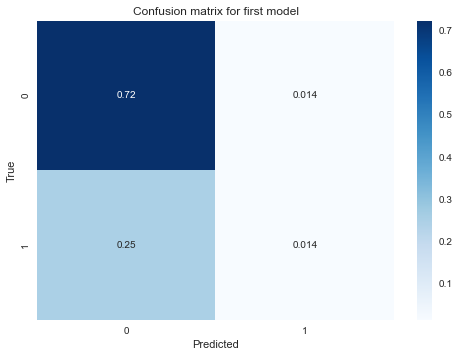

In [45]:
cf_matrix = confusion_matrix(y_test, y_pred_model_1)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Blues')
plt.title('Confusion matrix for first model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

We prefer to have false positives rather than false negatives in the sense that we prefer to expect a loss that does not occur rather than the opposite. 

Here we have 25% of false negatives which is a problem : we will underestimate the losses in this case.

For the evaluation of the next model, we will compare both f1 score and the number of false negatives.

## Second model : KNN

Doc : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


In [47]:
y_pred_model_2 = knn_clf.predict(X_test)
print(f"F1-score for model 2: {f1_score(y_test, y_pred_model_2, average = 'weighted')}")

F1-score for model 2: 0.674032278772121


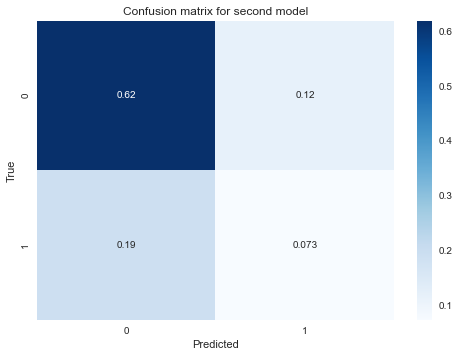

In [48]:
cf_matrix = confusion_matrix(y_test, y_pred_model_2)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Blues')
plt.title('Confusion matrix for second model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

This model leads to a small improvement both in terms of F1-score and false negatives. Let's have a look at another type of model.

## Third model : Tree based model (XGBoost)

Doc : https://xgboost.readthedocs.io/en/stable/parameter.html

In [49]:
import xgboost as xgb

In [50]:
#Minor modification in order to solve a xgboost issue with column name
X_train.columns = [c.replace("[", "_").replace("]", "_").replace("<", "_") for c in list(X_train.columns)]
X_test.columns =[c.replace("[", "_").replace("]", "_").replace("<", "_") for c in list(X_test.columns)]

In [51]:
xgb_clf = xgb.XGBClassifier(eval_metric='logloss').fit(X_train, y_train)

In [52]:
y_pred_model_3 = xgb_clf.predict(X_test)
print(f"F1-score for model 3: {f1_score(y_test, y_pred_model_3, average = 'weighted')}")

F1-score for model 3: 0.7733146642721279


The model has now a 77% F1 score compared to the 64% of the first model which is a huge improvement. It should be kept in mind that we did not perform a Cross Validation to guarantee the robustness of the model.

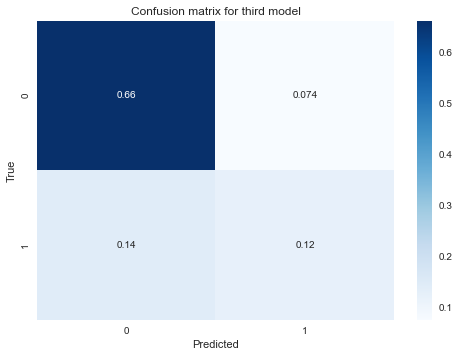

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred_model_3)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Blues')
plt.title('Confusion matrix for third model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

With this new model, we have 14% of false negatives which is again an improvement compared to the first model where we had 25% of false negatives. 

Based on these two metrics, we can conclude that the XGBoost model performs better than the logistic regression.

**Feature importances**

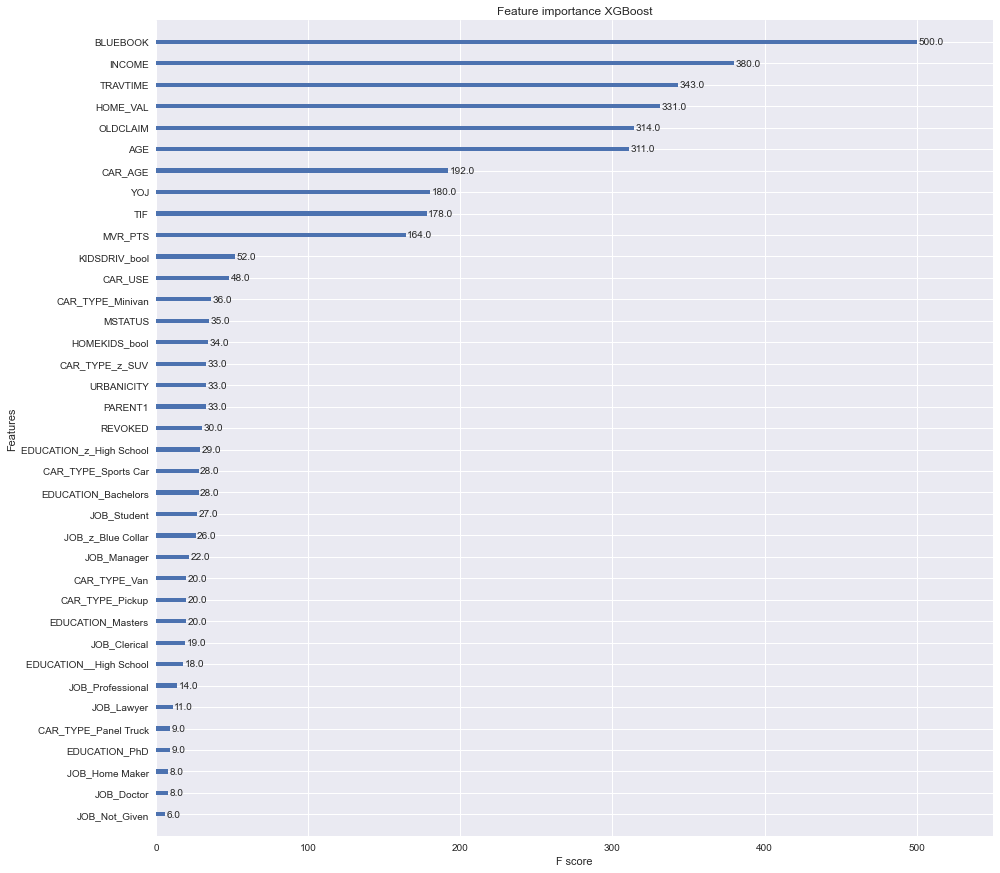

In [54]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
xgb.plot_importance(xgb_clf, ax = ax)
ax.set_title('Feature importance XGBoost')
plt.show()

# Hyperparameter tuning and export results

GridSearchCV since we want to hyperparameter tuning while avoiding overfitting : here we must do a stratified K-fold since our target is imbalanced.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

final_clf = xgb.XGBClassifier(eval_metric='logloss') #Classifier to optimize
kfolds = StratifiedKFold(5) #Cross validation 

#Parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'n_estimators': [20,50,100,150],
    'learning_rate': [0.1, 0.01, 0.05]
}

#Minor modification in order to solve a xgboost issue with column name
X.columns =[c.replace("[", "_").replace("]", "_").replace("<", "_") for c in list(X.columns)]

grid_search = GridSearchCV(final_clf, param_grid, scoring='f1_weighted', cv=kfolds.split(X,y))
grid_search.fit(X, y)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fb6d38a74a0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_d...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_

In [56]:
#pd.DataFrame(grid_search.cv_results_)

In [57]:
final_clf = grid_search.best_estimator_

In [58]:
y_pred_test = final_clf.predict(df_test.drop(columns = ['TARGET_FLAG']))

np.savetxt("prediction.csv", y_pred_test, delimiter=",")


# Conclusion

We explored 3 algorithms to predict whether a client will have an accident or not. The tree based model seems to be the most efficient according to the two metrics retained: the f1 score and the number of false negatives. 

We propose here to list some points that we could do to continue such a project: 

- Feature selection : in depth correlation analysis + feature importances
- More features engineering if we want to improve the model
- Try another encoding ? Catboost for instance
- Find more data
- Package code if we want to deploy it